<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [17]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,81.593558,-0.036029,91.557529,91.537206,0.020323
1,0.0,1.0,49.103302,0.448270,59.551572,59.099294,0.452278
2,0.0,2.0,87.150475,-0.100845,97.049631,97.085172,-0.035541
3,0.0,3.0,74.940003,0.099891,85.039894,84.894371,0.145523
4,0.0,4.0,46.342495,0.244503,56.586998,56.342935,0.244063
...,...,...,...,...,...,...,...
29995,999.0,25.0,85.344427,0.026073,95.370500,95.292318,0.078182
29996,999.0,26.0,73.707792,-0.018860,83.688932,83.650104,0.038828
29997,999.0,27.0,39.860412,-0.034615,49.825797,49.786497,0.039300
29998,999.0,28.0,41.788088,0.360391,52.148479,51.715097,0.433381


In [18]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,81.593558,-0.036029,91.557529,91.537206,0.020323
1,0.0,1.0,49.103302,0.448270,59.551572,59.099294,0.452278
2,0.0,2.0,87.150475,-0.100845,97.049631,97.085172,-0.035541
3,0.0,3.0,74.940003,0.099891,85.039894,84.894371,0.145523
4,0.0,4.0,46.342495,0.244503,56.586998,56.342935,0.244063
...,...,...,...,...,...,...,...
29995,999.0,25.0,85.344427,0.026073,95.370500,95.292318,0.078182
29996,999.0,26.0,73.707792,-0.018860,83.688932,83.650104,0.038828
29997,999.0,27.0,39.860412,-0.034615,49.825797,49.786497,0.039300
29998,999.0,28.0,41.788088,0.360391,52.148479,51.715097,0.433381


In [19]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    81.593558 -0.036029  91.557529  91.537206  0.020323
      1.0    49.103302  0.448270  59.551572  59.099294  0.452278
      2.0    87.150475 -0.100845  97.049631  97.085172 -0.035541
      3.0    74.940003  0.099891  85.039894  84.894371  0.145523
      4.0    46.342495  0.244503  56.586998  56.342935  0.244063
...                ...       ...        ...        ...       ...
999.0 25.0   85.344427  0.026073  95.370500  95.292318  0.078182
      26.0   73.707792 -0.018860  83.688932  83.650104  0.038828
      27.0   39.860412 -0.034615  49.825797  49.786497  0.039300
      28.0   41.788088  0.360391  52.148479  51.715097  0.433381
      29.0   65.808607  0.238672  76.047279  75.747132  0.300147

[30000 rows x 5 columns]

In [20]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    81.593558 -0.036029  91.557529  91.537206  0.020323
      1.0    49.103302  0.448270  59.551572  59.099294  0.452278
      2.0    87.150475 -0.100845  97.049631  97.085172 -0.035541
      3.0    74.940003  0.099891  85.039894  84.894371  0.145523
      4.0    46.342495  0.244503  56.586998  56.342935  0.244063
...                ...       ...        ...        ...       ...
999.0 25.0   85.344427  0.026073  95.370500  95.292318  0.078182
      26.0   73.707792 -0.018860  83.688932  83.650104  0.038828
      27.0   39.860412 -0.034615  49.825797  49.786497  0.039300
      28.0   41.788088  0.360391  52.148479  51.715097  0.433381
      29.0   65.808607  0.238672  76.047279  75.747132  0.300147

[30000 rows x 5 columns]

In [21]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,81.593558,-0.036029,91.557529,91.537206,0.020323
1,0.0,1.0,49.103302,0.448270,59.551572,59.099294,0.452278
2,0.0,2.0,87.150475,-0.100845,97.049631,97.085172,-0.035541
3,0.0,3.0,74.940003,0.099891,85.039894,84.894371,0.145523
4,0.0,4.0,46.342495,0.244503,56.586998,56.342935,0.244063
...,...,...,...,...,...,...,...
29995,999.0,25.0,85.344427,0.026073,95.370500,95.292318,0.078182
29996,999.0,26.0,73.707792,-0.018860,83.688932,83.650104,0.038828
29997,999.0,27.0,39.860412,-0.034615,49.825797,49.786497,0.039300
29998,999.0,28.0,41.788088,0.360391,52.148479,51.715097,0.433381


In [22]:
table.set_index(['rep', 'index'], inplace=True)

In [23]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    81.593558 -0.036029  91.557529  91.537206  0.020323
      1.0    49.103302  0.448270  59.551572  59.099294  0.452278
      2.0    87.150475 -0.100845  97.049631  97.085172 -0.035541
      3.0    74.940003  0.099891  85.039894  84.894371  0.145523
      4.0    46.342495  0.244503  56.586998  56.342935  0.244063
...                ...       ...        ...        ...       ...
999.0 25.0   85.344427  0.026073  95.370500  95.292318  0.078182
      26.0   73.707792 -0.018860  83.688932  83.650104  0.038828
      27.0   39.860412 -0.034615  49.825797  49.786497  0.039300
      28.0   41.788088  0.360391  52.148479  51.715097  0.433381
      29.0   65.808607  0.238672  76.047279  75.747132  0.300147

[30000 rows x 5 columns]

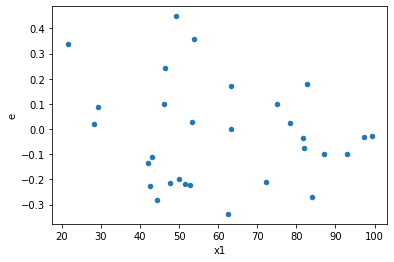

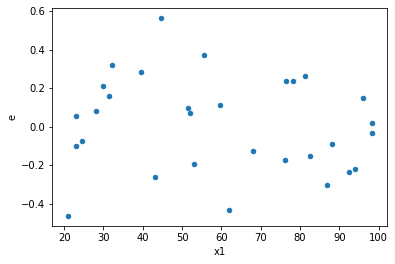

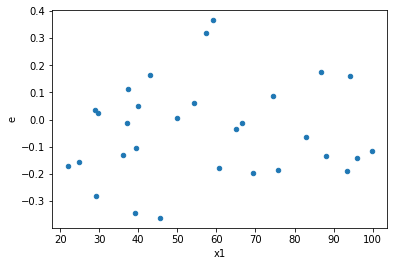

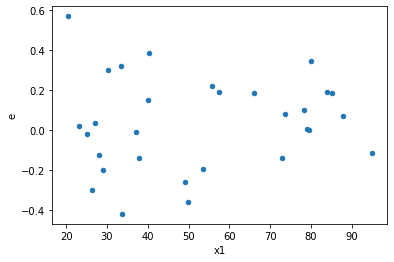

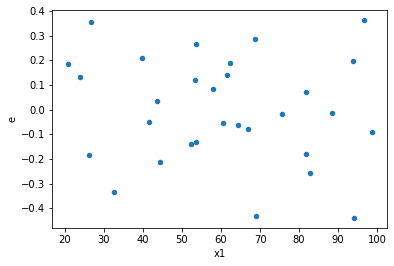

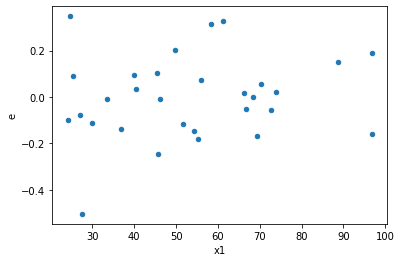

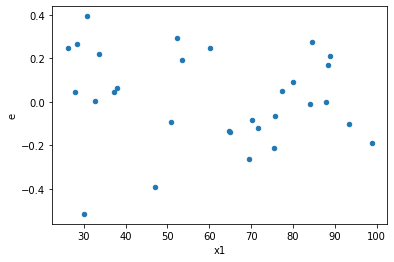

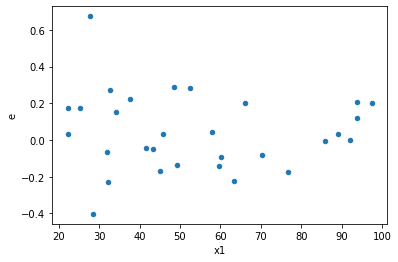

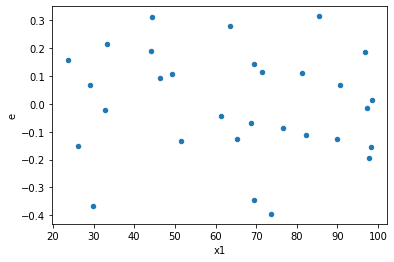

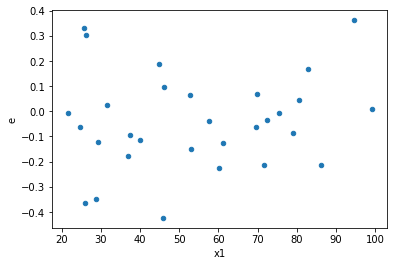

In [24]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [25]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,11.0,11.0,0.5074928216075127,0.7094600806449224,0.04613571105522843,0.06449637096772022,1.3979706715804705,0.5879073128565069,0.7060463435717466,0.29395365642825344,Reject001=1 : Homoscedasticity
19.0,11.0,11.0,0.16799943305142964,0.3306743107296441,0.015272675731948149,0.03006130097542219,1.9683061110594036,0.2766917683425476,0.8616541158287262,0.1383458841712738,Reject001=1 : Homoscedasticity
24.0,11.0,11.0,0.2729724921665519,0.2731275230151554,0.02481568110605017,0.024829774819559582,1.000567935792259,0.9992656122533665,0.5003671938733167,0.49963280612668326,Reject001=1 : Homoscedasticity
28.0,11.0,11.0,0.36496175370478484,0.5750103892282238,0.03317834124588953,0.05227367174802034,1.5755360209424736,0.463020641867411,0.7684896790662945,0.2315103209337055,Reject001=1 : Homoscedasticity
32.0,11.0,11.0,0.4294803779465629,0.43592526182114105,0.03904367072241481,0.03962956925646737,1.0150062359202359,0.9807363408627758,0.5096318295686121,0.4903681704313879,Reject001=1 : Homoscedasticity
42.0,11.0,11.0,0.4917186751896214,0.5321072608463815,0.04470169774451104,0.048373387349671046,1.082137587394225,0.8981880494458707,0.5509059752770646,0.44909402472293536,Reject001=1 : Homoscedasticity
63.0,11.0,11.0,0.3702248832338612,0.7147654502541619,0.03365680756671466,0.0649786772958329,1.930625094701329,0.29039110258027967,0.8548044487098602,0.14519555129013983,Reject001=1 : Homoscedasticity
83.0,11.0,11.0,0.2381557072892464,0.27383274698636667,0.021650518844476944,0.024893886089669696,1.149805520527751,0.8210426415167196,0.5894786792416402,0.4105213207583598,Reject001=1 : Homoscedasticity
95.0,11.0,11.0,0.3389497070232581,0.3649949563536455,0.0308136097293871,0.033181359668513224,1.0768410439387108,0.9044835598329688,0.5477582200835156,0.4522417799164844,Reject001=1 : Homoscedasticity


In [27]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.5830090664848603,0.18881327701250755,0.05300082422589639,0.017164843364773415,0.32385993266094554,0.07449817826864237,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,0.6700848113319291,0.42285284460404843,0.060916801030175376,0.03844116769127713,0.6310437685694484,0.4573958194642514,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,0.23746633804625744,0.19489839578894208,0.02158784891329613,0.017718035980812917,0.820741151745797,0.7489756259388273,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,0.7620649157168154,0.19805115554327501,0.06927862870152868,0.018004650503934093,0.2598875128072044,0.034766254576227874,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,0.5074928216075127,0.7094600806449224,0.04613571105522843,0.06449637096772022,1.3979706715804705,0.5879073128565069,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,0.4898310544069209,0.2787279486188921,0.044530095855174624,0.02533890441989928,0.5690287418717688,0.36376833232195216,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,0.7980128130814088,0.26945260834385587,0.07254661937103717,0.024495691667623262,0.3376544886584018,0.08534918362472918,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,0.7899959820530676,0.15444383341067325,0.07181781655027887,0.014040348491879386,0.1954995176169118,0.011711891861995971,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,0.38857999247792324,0.37232328364921635,0.035325453861629386,0.03384757124083785,0.9581638037382213,0.9447686837564728,Reject001=1 : Homoscedasticity


In [28]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      941
Reject001=0 : Heteroscedasticity     59
Name: Result_test, dtype: int64